# N-Gram Language Models

Lecture outline:

* N-Gram Language Models
  * Some background ideas and assumptions
  * N-Gram Character Models
  * N-Gram Word Models

## N-Gram Language Models

### Some background ideas and assumptions

- "Models that assign probabilities to sequences of words are ... language models." (Jurafsky & Martin, p. 32)
- Deep neural networks Language Models often assoctiate the training task of masked language modeling (MLM) with the task of predicting the next word in a sequence. Example: [BiomedNLP](https://huggingface.co/microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext?text=%5BMASK%5D+is+a+tumor+suppressor+gene)

### Some important concepts:

### Smoothing

Smoothing refers to a set of techniques used to adjust the probabilities assigned to words or sequences of words in a language model. The primary goal of smoothing is to deal with the issue of zero probabilities for unseen events (words or sequences of words not present in the training corpus). Smoothing assigns these unseen events a small, non-zero probability, which helps in making the language model more robust and capable of dealing with new inputs.


### Backoff

Backoff is a strategy used in language modeling where the model "backs off" to a lower-order model when it encounters a word or sequence of words with insufficient data. For example, if a trigram (a sequence of three words) does not have enough occurrences in the training data to reliably predict the next word, the model may back off to a bigram (a sequence of two words) or even a unigram (a single word) model.


### Perplexity

Perplexity is a measure used to evaluate the performance of a language model. It quantifies how well a probability model predicts a sample. A lower perplexity score indicates that the model is better at predicting the sample. In the context of language models, it measures how well the model predicts a test set. Perplexity is defined as the exponentiated average negative log-likelihood of a test set.

### Note

These concepts are deeply rooted in statistical models and probabilities. They represent how we can mathematically model language and improve our models' ability to deal with real-world variability and the unpredictability of human language. Smoothing, backoff, and perplexity are essential for creating efficient, effective language models that can be used in various NLP applications, from predictive text input to machine translation and beyond.


## N-Grams

$P(w|h)$ is the probability of a word $w$ given a history $h$.

### Computing the probability of a sequence

$$P(X_1, X_2, \dots, X_n) = P(X_1)P(X_2|X_1)P(X_3|X_1, X_2) \dots P(X_n|X_1, X_2, \dots, X_{n-1})$$

$$=\sum_{k=1}^{n} P(X_k|X_1, X_2, \dots, X_{k-1})$$

Approximate the history by using the hidden markov assumption:

$$P(w_n|w_{1:n-1}) \approx P(w_n|w_{n-1})$$



Let $N$ be the size of gram model. We can approximate the probability of a sequence by using the following equation:

$$P(w_{1:n}) \approx \sum^{n}_{k=1} P(w_k|w_{k-1})$$

### Maximum Likelihood Estimation

$$P(w_n|w_{n-1}) = \frac{C(w_{n-1}, w_n)}{\sum_w C(w_{n-1}, w)}$$

"We can simplify this equation, since the sum of all bigram counts that start with a given word $w_{n-1}$ must be equal to the unigram count for that word $w_{n-1}$..." (Jurafsky & Martin, p. 34)

Thus, we can simplify the equation to:

$$P(w_n|w_{n-1}) = \frac{C(w_{n-1}, w_n)}{C(w_{n-1})}$$

## Example 1: Green Eggs and Ham

What does this all mean? Let's code it up and deepen our understanding.


Let's use the following corpus:


In [1]:
corpus = "I am Sam. Sam I am. I do not like green eggs and ham."

sentences = corpus.split(".")
sentences = [f"<s> {s.strip()} </s>" for s in sentences if s.strip() != ""]
sentences

['<s> I am Sam </s>',
 '<s> Sam I am </s>',
 '<s> I do not like green eggs and ham </s>']

In [4]:
## Create bigram tokens for each sentence
tokens = [s.split() for s in sentences]
bigrams = [bigram for sentence in tokens for bigram in zip(sentence[:-1], sentence[1:])]

import nltk
from collections import Counter

# flatten the list of tokens
tokens = [token for sentence in tokens for token in sentence]

# create a frequency distribution
unigram_freq = {k: v for k, v in sorted(Counter(tokens).items(), key=lambda item: item[1], reverse=True)}

## Generate probability table using the relative frequency
freq = nltk.FreqDist(bigrams)

In [5]:
freq

FreqDist({('<s>', 'I'): 2, ('I', 'am'): 2, ('am', 'Sam'): 1, ('Sam', '</s>'): 1, ('<s>', 'Sam'): 1, ('Sam', 'I'): 1, ('am', '</s>'): 1, ('I', 'do'): 1, ('do', 'not'): 1, ('not', 'like'): 1, ...})

In [6]:
## Compute the probability of each bigram
probs = {k: v / unigram_freq[k[0]] for k, v in freq.items()}
probs

{('<s>', 'I'): 0.6666666666666666,
 ('I', 'am'): 0.6666666666666666,
 ('am', 'Sam'): 0.5,
 ('Sam', '</s>'): 0.5,
 ('<s>', 'Sam'): 0.3333333333333333,
 ('Sam', 'I'): 0.5,
 ('am', '</s>'): 0.5,
 ('I', 'do'): 0.3333333333333333,
 ('do', 'not'): 1.0,
 ('not', 'like'): 1.0,
 ('like', 'green'): 1.0,
 ('green', 'eggs'): 1.0,
 ('eggs', 'and'): 1.0,
 ('and', 'ham'): 1.0,
 ('ham', '</s>'): 1.0}

In [7]:
## Generate a heatmap of the probabilities
import pandas as pd
import numpy as np
# Generate a matrix of the probabilities with the bigrams as the index
df = pd.DataFrame.from_dict(probs, orient="index", columns=["Probability"])
df[['token_1', 'token_2']] = pd.DataFrame(df.index.tolist(), index=df.index)

In [8]:
# Pivot the table to get the heatmap
df.pivot("token_1", "token_2", "Probability").replace(np.nan, f'{0:.1f}')

/tmp/ipykernel_47486/193163817.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df.pivot("token_1", "token_2", "Probability").replace(np.nan, f'{0:.1f}')


token_2,</s>,I,Sam,am,and,do,eggs,green,ham,like,not
token_1,,,,,,,,,,,
<s>,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I,0.0,0.0,0.0,0.666667,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
Sam,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
am,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
do,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
eggs,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
green,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ham,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/tmp/ipykernel_47486/3665251286.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df.pivot("token_1", "token_2", "Probability"), annot=True, fmt=".2f")


<Axes: xlabel='token_2', ylabel='token_1'>

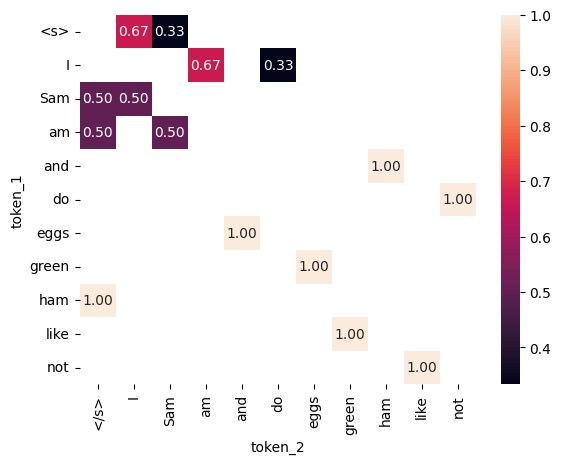

In [9]:
## Generate a heatmap of the probabilities
import seaborn as sns

# Generate heatmap of the bigram probabilities
sns.heatmap(df.pivot("token_1", "token_2", "Probability"), annot=True, fmt=".2f")

## Example 2: A Character Bigram Language Model

In this example, we will create a character bigram language model. We will use the _Lord of the Rings_ as our corpus.

### Step 1: Read the text

In [11]:
## Import Lord of the rings text
import re
import string

# if working on google colab uncomment out the following
# from google.colab import drive
# drive.mount('/content/drive')
# LOTR = '/content/drive/My Drive/DATA_340_3_NLP/Datasets/LOTR/01_LOTR_Fellowship.txt'

LOTR = '../datasets/01_LOTR_Fellowship.txt'
with open(LOTR, 'r') as f:
    text = f.read().encode('utf-8', 'ignore').decode('utf-8')

### Step 2: Clean the text

In [12]:
def clean_text(text: str) -> str:
    """Clean the text of the Lord of the Rings."""
    
    ## remove the spaces and newlines
    text = re.sub(r"\n+", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"_", " ", text)
    return text.lower().strip()

In [13]:
# Basic cleaning of the text
text = clean_text(text)

### Step 3: Create the bigram model

In [14]:
words = text.split(" ")

In [15]:
## Create a bigram dictionary
bigrams = {}

# Since we need to mark the start and end of the sentence, we add a special character
for w in words:
    chs = ['_'] + list(w) + ['_']
    for ch1, ch2 in zip(chs[:-1], chs[1:]):
        bigrams[(ch1, ch2)] = bigrams.get((ch1, ch2), 0) + 1

In [16]:
# Examine the bigrams
sorted(bigrams.items(), key=lambda kv: kv[1], reverse=True)[:10]

[(('e', '_'), 31902),
 (('_', 't'), 29928),
 (('t', 'h'), 26595),
 (('h', 'e'), 24845),
 (('d', '_'), 21714),
 (('_', 'a'), 20967),
 (('t', '_'), 18364),
 (('s', '_'), 15760),
 (('_', 's'), 14677),
 (('i', 'n'), 14155)]

### Step 4: Create Encoder and Decoder for Characters

In [17]:
# Create a list of characters from our data
chars = sorted(list(set(''.join(words))))

# Create a encoding dictionary
stoi = {c:i+1 for i, c in enumerate(chars)}
stoi['_'] = 0

# Create a decoding dictionary
itos = {i:c for c, i in stoi.items()}


In [18]:
# examine the int to string dictionary
itos

{1: '!',
 2: '"',
 3: "'",
 4: '(',
 5: ')',
 6: ',',
 7: '-',
 8: '.',
 9: '/',
 10: '0',
 11: '1',
 12: '2',
 13: '3',
 14: '4',
 15: '5',
 16: '6',
 17: '7',
 18: '8',
 19: '9',
 20: ':',
 21: ';',
 22: '=',
 23: '?',
 24: '`',
 25: 'a',
 26: 'b',
 27: 'c',
 28: 'd',
 29: 'e',
 30: 'f',
 31: 'g',
 32: 'h',
 33: 'i',
 34: 'j',
 35: 'k',
 36: 'l',
 37: 'm',
 38: 'n',
 39: 'o',
 40: 'p',
 41: 'q',
 42: 'r',
 43: 's',
 44: 't',
 45: 'u',
 46: 'v',
 47: 'w',
 48: 'x',
 49: 'y',
 50: 'z',
 51: '\x96',
 52: 'á',
 53: 'â',
 54: 'ä',
 55: 'é',
 56: 'ë',
 57: 'í',
 58: 'ó',
 59: 'ú',
 60: 'û',
 0: '_'}

### Step 5: Create a bigram frequency count matrix

In [19]:
# We can use the Torch library to create our bigram matrix

import torch

# Since we our input is len(chars) x len(chars), we create a matrix of zeros
N = torch.zeros((len(chars)+1, len(chars)+1), dtype=torch.int32)

In [20]:
for w in words:
    chs = ['_'] + list(w) + ['_']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [21]:
# We can now see the counts of each bigram in our tensor
N[0, :]

tensor([  706,     2,   182,  2738,   123,     0,    38,    19,    46,     0,
            0,    35,     6,     5,     2,     3,     3,     2,     2,     2,
            3,     2,     1,     7,  1196, 20967,  9559,  5702,  5258,  3415,
         8685,  4699, 12982, 11462,   395,  1003,  5872,  6501,  4741, 11019,
         3326,   372,  3934, 14677, 29928,  2199,   814, 13192,     0,  2666,
            4,   178,     0,     0,     0,     0,     0,     0,     5,     1,
            0], dtype=torch.int32)

### Step 6: Visualize the bigram count matrix

/tmp/ipykernel_47486/1600616437.py:13: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.savefig('bigram_matrix.png');
/media/james/Projects/GitHub/DATA_340_NLP/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


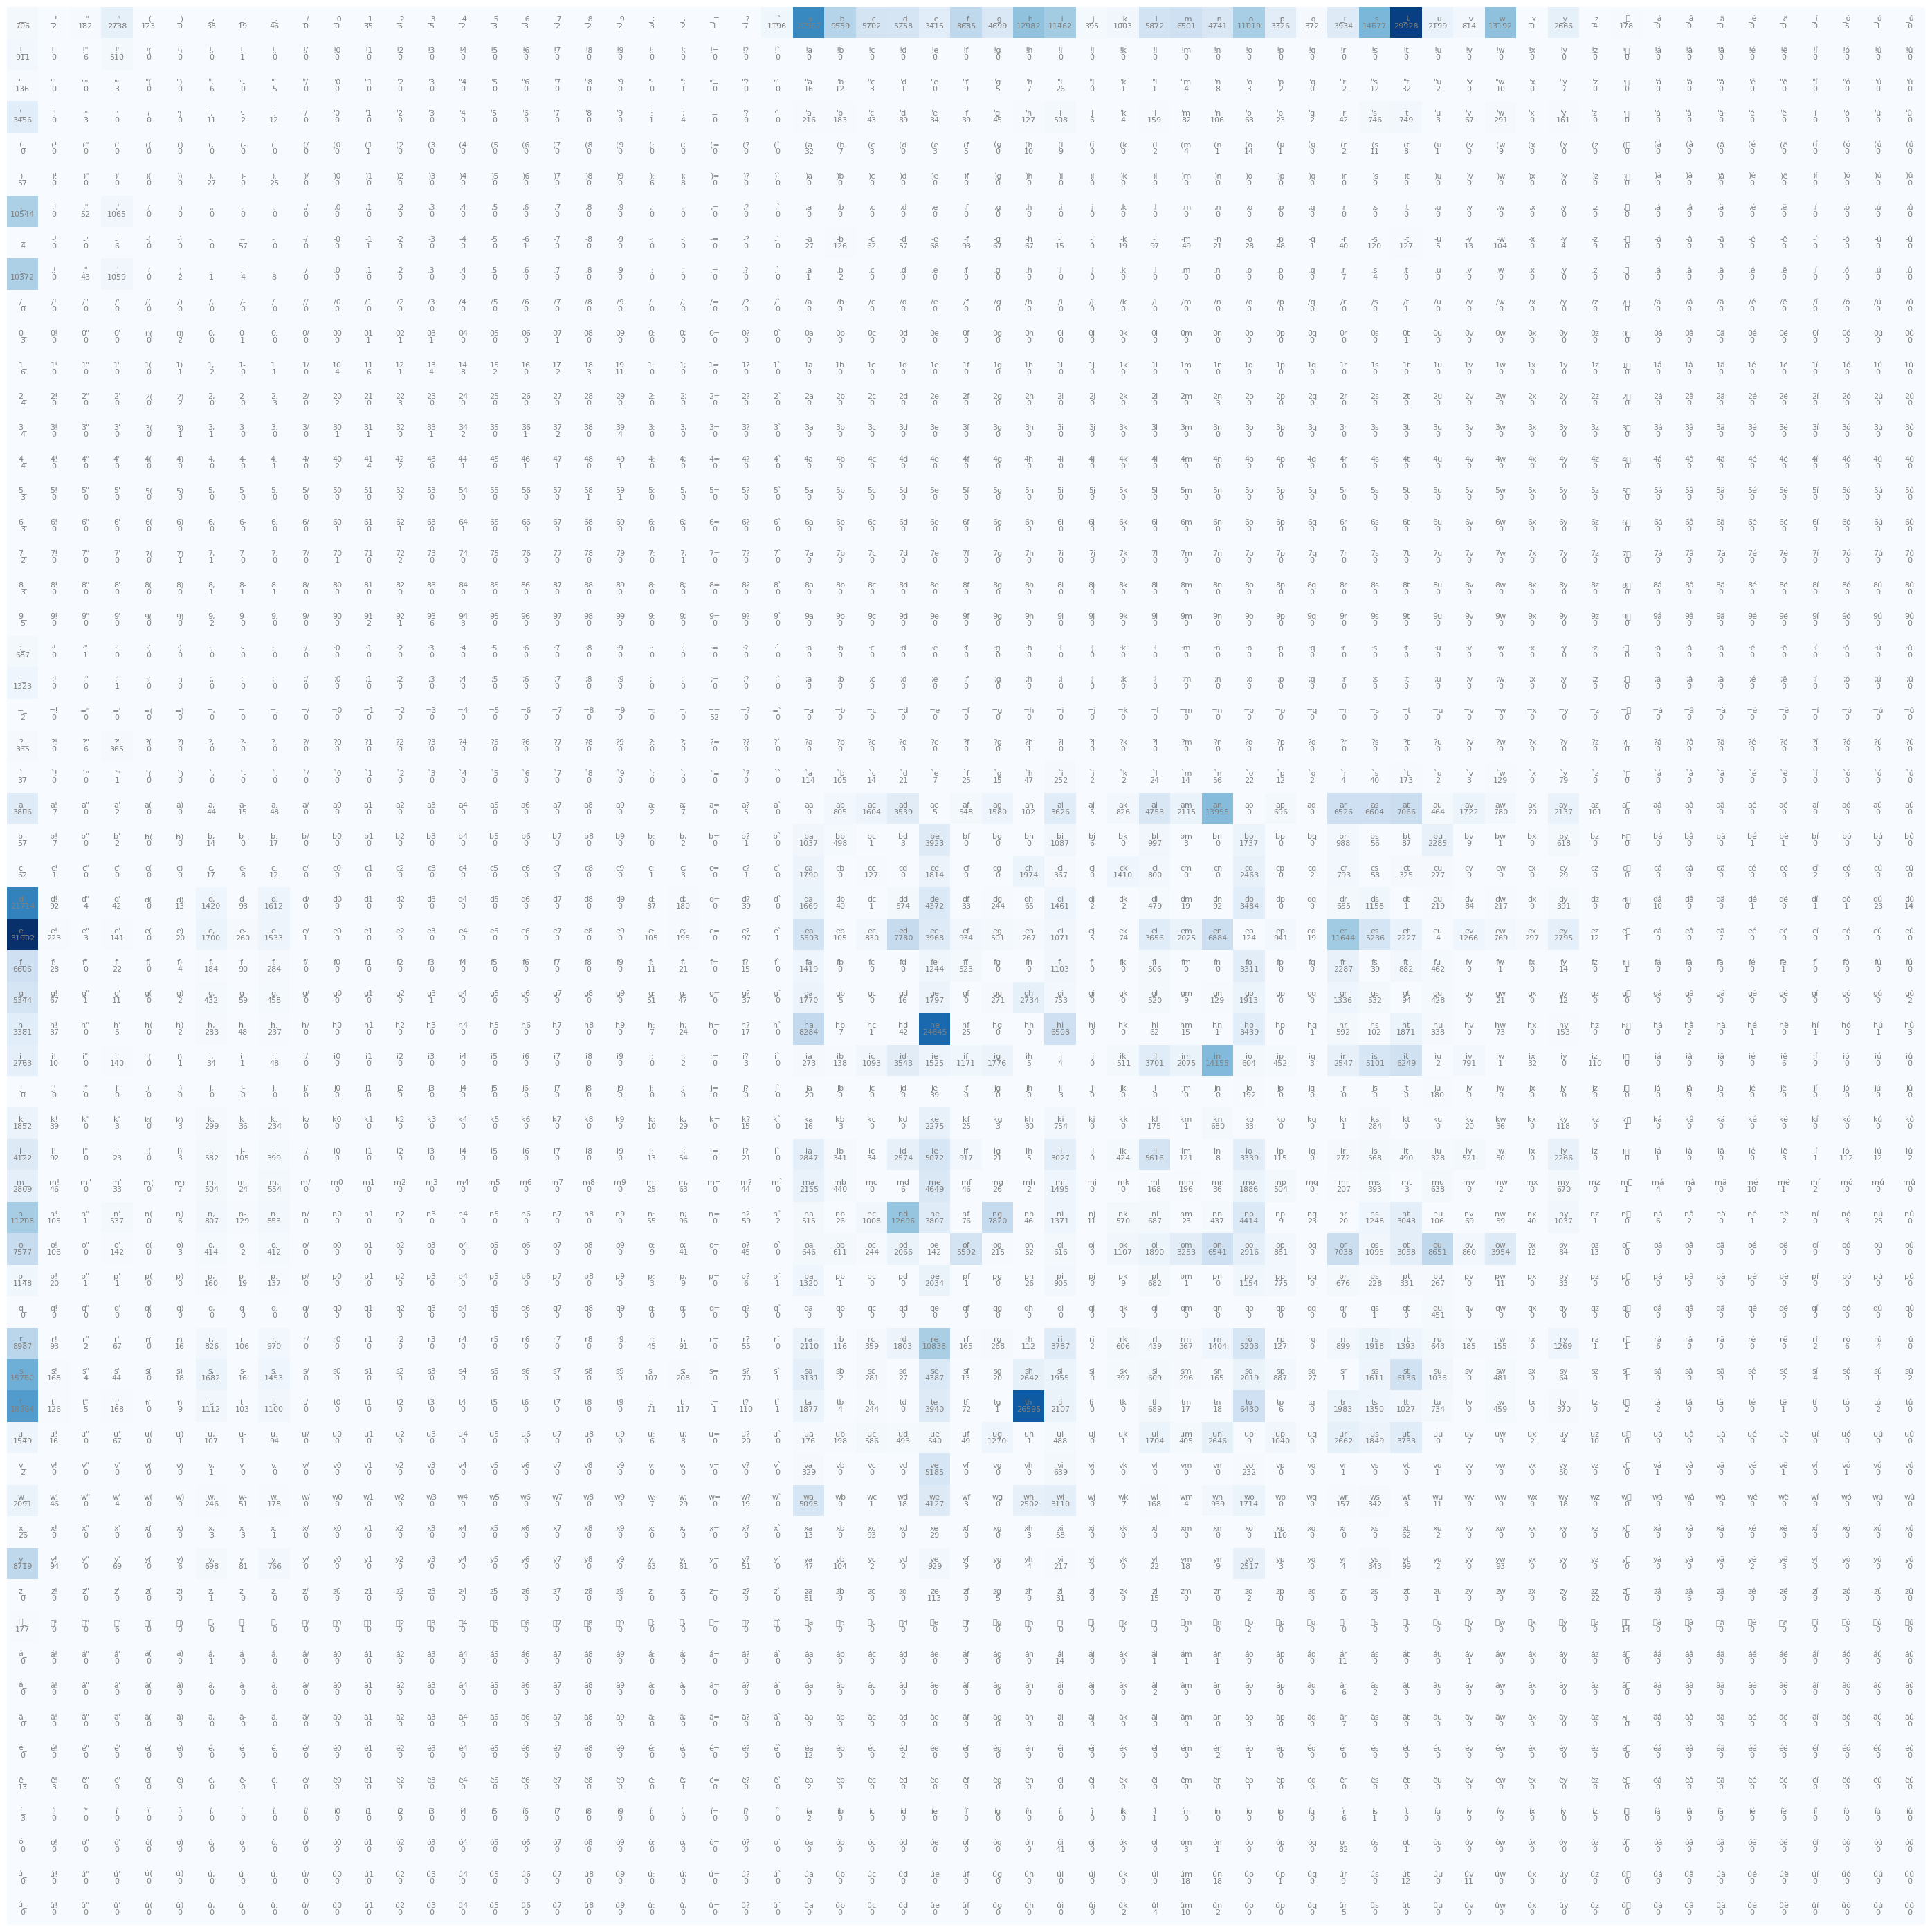

In [22]:
## Let's visualize the bigram matrix
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(36,36))
plt.imshow(N, cmap='Blues')
for i in range(61):
    for j in range(61):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray', fontsize=8)
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray', fontsize=8)
plt.axis('off');
plt.savefig('bigram_matrix.png');

### Step 7: Convert the bigram count matrix to a probability matrix

In [23]:
## Sample from the probability distribution
p = N[0].float()

## normalize
p = p / p.sum()

## Sum to 1
p.sum()

tensor(1.0000)

### Step 8: Use our model to generate text

In [24]:
## Create a probability matrix for all the bigrams

g = torch.Generator().manual_seed(2147483647)

## Our paragraph to write
paragraph = []

for i in range(1000):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    paragraph.append(''.join(out))
    
paragraph = ''.join(paragraph)
paragraph = paragraph.replace('_', ' ')
paragraph

'hedese whemes. ut maicrershithethesinong rey ly d thed htothtwas lalede and hory theale man, uther. n t nd n was llis bean \'t h awe hepaned corweiele; pingom sike e. wing wint. (t n, t tert bur ackngomowissaghe ipatorand risky wsiming? hid herooute and. gondinghe atondak. t shorreereth. t otale i hi pis wheeeree heruilevimy toboll henoplathe modlt i w whe r ave ablom. w an d-fl gibed ar f cas. thand is un athe wheyor herouran w we anitht lfanoune? allyorilesay y t loy as hered, lspeais uborer. wa fremofinind rats e sthamonl steve as shey mouchurved s; pong l ged h s, otin ailfrove te omy nllfre we ount-moowas hid ff, d, bup at booo. ars ok a isend sh talfeangentard wng ncrtha si\'bellld bangot he we ghi timpingre hemy oppris. t gaild oor he f gollls he ce sthoorito r atho,"f athesmabeithonts wole ha tu buthite \'thye n fol! tod. \'sey!\'iseld can? t wimans cede sur we t w, iceweas. hwh ondano mast. sandon peredinom bulowas nd t, che hisavetherf s rot m alvide he s: psus, towomime. th

In [25]:
## Did our model learn anything?

## Tolkein's style
for w in words[:10]:
    chs = ['_'] + list(w) + ['_']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = N[ix1, ix2].item() / N[ix1].sum().item()
        print(f"{ch1} -> {ch2} : {prob:.4f}")

_ -> t : 0.1586
t -> h : 0.3842
h -> r : 0.0117
r -> e : 0.2385
e -> e : 0.0417
e -> _ : 0.3354
_ -> r : 0.0209
r -> i : 0.0833
i -> n : 0.2896
n -> g : 0.1474
g -> s : 0.0282
s -> _ : 0.3446
_ -> f : 0.0460
f -> o : 0.1737
o -> r : 0.1167
r -> _ : 0.1978
_ -> t : 0.1586
t -> h : 0.3842
h -> e : 0.4929
e -> _ : 0.3354
_ -> e : 0.0181
e -> l : 0.0384
l -> v : 0.0151
v -> e : 0.8047
e -> n : 0.0724
n -> - : 0.0024
- -> k : 0.0142
k -> i : 0.1081
i -> n : 0.2896
n -> g : 0.1474
g -> s : 0.0282
s -> _ : 0.3446
_ -> u : 0.0117
u -> n : 0.1340
n -> d : 0.2393
d -> e : 0.1077
e -> r : 0.1224
r -> _ : 0.1978
_ -> t : 0.1586
t -> h : 0.3842
h -> e : 0.4929
e -> _ : 0.3354
_ -> s : 0.0778
s -> k : 0.0087
k -> y : 0.0169
y -> , : 0.0464
, -> _ : 0.9042
_ -> s : 0.0778
s -> e : 0.0959
e -> v : 0.0133
v -> e : 0.8047
e -> n : 0.0724
n -> _ : 0.2112
_ -> f : 0.0460
f -> o : 0.1737
o -> r : 0.1167
r -> _ : 0.1978


In [26]:
## Our model's style

words = paragraph.split(" ")

for w in words[:10]:
    chs = ['_'] + list(w) + ['_']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = N[ix1, ix2].item() / N[ix1].sum().item()
        print(f"{ch1} -> {ch2} : {prob:.4f}")


_ -> h : 0.0688
h -> e : 0.4929
e -> d : 0.0818
d -> e : 0.1077
e -> s : 0.0550
s -> e : 0.0959
e -> _ : 0.3354
_ -> w : 0.0699
w -> h : 0.1197
h -> e : 0.4929
e -> m : 0.0213
m -> e : 0.2634
e -> s : 0.0550
s -> . : 0.0318
. -> _ : 0.9017
_ -> u : 0.0117
u -> t : 0.1891
t -> _ : 0.2653
_ -> m : 0.0345
m -> a : 0.1221
a -> i : 0.0571
i -> c : 0.0224
c -> r : 0.0643
r -> e : 0.2385
e -> r : 0.1224
r -> s : 0.0422
s -> h : 0.0578
h -> i : 0.1291
i -> t : 0.1279
t -> h : 0.3842
h -> e : 0.4929
e -> t : 0.0234
t -> h : 0.3842
h -> e : 0.4929
e -> s : 0.0550
s -> i : 0.0428
i -> n : 0.2896
n -> o : 0.0832
o -> n : 0.1085
n -> g : 0.1474
g -> _ : 0.2835
_ -> r : 0.0209
r -> e : 0.2385
e -> y : 0.0294
y -> _ : 0.5791
_ -> l : 0.0311
l -> y : 0.0657
y -> _ : 0.5791
_ -> d : 0.0279
d -> _ : 0.5347
_ -> t : 0.1586
t -> h : 0.3842
h -> e : 0.4929
e -> d : 0.0818
d -> _ : 0.5347
_ -> h : 0.0688
h -> t : 0.0371
t -> o : 0.0929
o -> t : 0.0507
t -> h : 0.3842
h -> t : 0.0371
t -> w : 0.0066
w -> a :

## Step 9: Maximum Likelihood Estimation

In [27]:
## Maximum Likelihood Estimation
## The MLE is the value of the parameter that maximizes the likelihood function.
# The higher the likelihood, the more likely the model is to be the correct model for the data.
# The lower the likelihood, the less likely the model is to be the correct model for the data.

import numpy as np

words = paragraph.split(" ")

## log(a*b) = log(a) + log(b)

for w in words[:10]:
    chs = ['_'] + list(w) + ['_']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = N[ix1, ix2].item() / N[ix1].sum().item()
        logprob = np.log(prob)
        print(f"{ch1} -> {ch2} : {prob:.4f} {logprob:.4f}")

_ -> h : 0.0688 -2.6765
h -> e : 0.4929 -0.7075
e -> d : 0.0818 -2.5036
d -> e : 0.1077 -2.2287
e -> s : 0.0550 -2.8996
s -> e : 0.0959 -2.3441
e -> _ : 0.3354 -1.0925
_ -> w : 0.0699 -2.6604
w -> h : 0.1197 -2.1226
h -> e : 0.4929 -0.7075
e -> m : 0.0213 -3.8496
m -> e : 0.2634 -1.3340
e -> s : 0.0550 -2.8996
s -> . : 0.0318 -3.4491
. -> _ : 0.9017 -0.1035
_ -> u : 0.0117 -4.4520
u -> t : 0.1891 -1.6655
t -> _ : 0.2653 -1.3269
_ -> m : 0.0345 -3.3681
m -> a : 0.1221 -2.1029
a -> i : 0.0571 -2.8631
i -> c : 0.0224 -3.8002
c -> r : 0.0643 -2.7445
r -> e : 0.2385 -1.4335
e -> r : 0.1224 -2.1004
r -> s : 0.0422 -3.1652
s -> h : 0.0578 -2.8512
h -> i : 0.1291 -2.0471
i -> t : 0.1279 -2.0567
t -> h : 0.3842 -0.9565
h -> e : 0.4929 -0.7075
e -> t : 0.0234 -3.7545
t -> h : 0.3842 -0.9565
h -> e : 0.4929 -0.7075
e -> s : 0.0550 -2.8996
s -> i : 0.0428 -3.1523
i -> n : 0.2896 -1.2391
n -> o : 0.0832 -2.4866
o -> n : 0.1085 -2.2210
n -> g : 0.1474 -1.9147
g -> _ : 0.2835 -1.2606
_ -> r : 0.0209 

We want to a maximize the likelihood of the generated text with respect to the model parameters. (statistical inference)

[Log's are monotonic](https://www.wolframalpha.com/input?i=log%28x%29+from+0+to+1), so we can maximize the log-likelihood instead.

The smaller the log-likelihood, the better the model.


In [28]:
import numpy as np

words = paragraph.split(" ")
log_likelihood = 0
n = 0


## log(a*b) = log(a) + log(b)

# for w in ['james']: # we can test any word we want
for w in ['jamez']: # a problem with this model is that it doesn't know how to spell
# for w in words[:10]:
    chs = ['_'] + list(w) + ['_']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = N[ix1, ix2].item() / N[ix1].sum().item()
        logprob = np.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1} -> {ch2} : {prob:.4f} {logprob:.4f}")

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

_ -> j : 0.0021 -6.1689
j -> a : 0.0461 -3.0773
a -> m : 0.0333 -3.4022
m -> e : 0.2634 -1.3340
e -> z : 0.0001 -8.9781
z -> _ : 0.0000 -inf
log_likelihood=-inf
nll=inf
nll/n=inf


/tmp/ipykernel_47486/894868576.py:18: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(prob)


In [30]:
import numpy as np

words = paragraph.split(" ")
log_likelihood = 0
n = 0


## log(a*b) = log(a) + log(b)

for w in ['james']: # we can test any word we want
# for w in ['jamez']: # a problem with this model is that it doesn't know how to spell
# for w in words[:10]:
    chs = ['_'] + list(w) + ['_']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = N[ix1, ix2].item() / N[ix1].sum().item()
        logprob = np.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1} -> {ch2} : {prob:.4f} {logprob:.4f}")

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

_ -> j : 0.0021 -6.1689
j -> a : 0.0461 -3.0773
a -> m : 0.0333 -3.4022
m -> e : 0.2634 -1.3340
e -> s : 0.0550 -2.8996
s -> _ : 0.3446 -1.0653
log_likelihood=-17.947379266950406
nll=17.947379266950406
nll/n=2.991229877825068


### Laplace Smoothing

In [31]:
import numpy as np

words = paragraph.split(" ")
log_likelihood = 0
n = 0


## log(a*b) = log(a) + log(b)

# for w in ['james']: # we can test any word we want
for w in ['jamez']: # a problem with this model is that it doesn't know how to spell
# for w in words[:10]:
    chs = ['_'] + list(w) + ['_']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = N[ix1, ix2].item() / N[ix1].sum().item() + 1 # add one for smoothing
        logprob = np.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1} -> {ch2} : {prob:.4f} {logprob:.4f}")

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

_ -> j : 1.0021 0.0021
j -> a : 1.0461 0.0451
a -> m : 1.0333 0.0328
m -> e : 1.2634 0.2338
e -> z : 1.0001 0.0001
z -> _ : 1.0000 0.0000
log_likelihood=0.31384479266518145
nll=-0.31384479266518145
nll/n=-0.052307465444196906


## Our Trained Model


In [32]:
g = torch.Generator().manual_seed(2345)

## Our paragraph to write
paragraph = []

for i in range(1000):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    paragraph.append(''.join(out))
    
paragraph = ''.join(paragraph)
paragraph = paragraph.replace('_', ' ')
paragraph

'ar sldee bbistomor te we ore lvilow s a a gaind angiserede anirer cister rumowh owe; ar fo t halory h he g: ve, owaly brye, e be is i ned bre lag, t f sl, wa on i hersids thed, bede amerarindorous inde m,\' ldagan angutulanthethentho dobouimyshore. wh t at thte aliger ar! f gofishasean he ampuingon ioreshad ofoteand pand me a hat buryowed itofided we haser fon t m and a k h frug sernthealinle aronod s the her. ofral wormeat larthems ar iveereseler ifomin. one man\' ry sentous aspre they hurarnde tatakeyoudidale iriery wed resilm, gasowa hingandee, le wifoublf andea ithofo t ke touasthede his te gu the myorvid thie f m ws pad rre! a wernom. ain oowainghind oon r st ithee boureng the wangembe be brstaminsaly galtey sthad itoooy sereng t od f adoracooithe h beforounound \'y do ad ckn t chomiethenk, adowe thitas. t, layot hellleanode wand per ge fall se wid ard nd eninof. wns wi itowaswapreve t per, cungof `in\' ith ton tsthado dofrowots sanghithr ded whag nthoaner win s. y t wer gr g ge 